# Data Cleaning with Pandas

In [87]:
import numpy as np
import pandas as pd

from datetime import datetime

In [10]:
df_housing = pd.read_csv('dataset/property_data.csv')
display(df_housing)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [12]:
df_housing.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    2
NUM_BATH        1
SQ_FT           1
dtype: int64

## Standard Missing Values
bagi pandas, yang dianggap missing value saat import akan ditandain dengan `NaN` - yang kosong.   

Kita bisa tambahin default missing valuenya misalkan untuk include `--` dan `na` sebagai missing value juga

In [23]:
# saat baca datanya, tambahkan opsi na_values
df_housing = pd.read_csv("dataset/property_data.csv", 
                         na_values = ["na", "--", "n/a"])

display(df_housing)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [14]:
# NaN bisa dibaca dengan built-in function isnull() milik pandas
df_housing.isnull().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    1
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [15]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           8 non-null      float64
 1   ST_NUM        7 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  8 non-null      object 
 4   NUM_BEDROOMS  5 non-null      float64
 5   NUM_BATH      8 non-null      object 
 6   SQ_FT         7 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


## Unexpected Missing Value
salah input atau lainnya, tipe data invalid untuk data tersebut, kita anggp missing value juga. contohnya jumlah wc "HURLEY" bukang angka.

In [24]:
df_housing[['OWN_OCCUPIED']] # apakah rumahnya sedang ditempati?

,OWN_OCCUPIED
0,Y
1,N
2,N
3,12
4,Y
5,Y
6,NaN
7,Y
8,Y


In [21]:
cnt=0
# untuk setiap baris data di kolom 'OWN_OCCUPIED'
for row in df_housing['OWN_OCCUPIED']:
    try: # kita akan coba
        int(row) # ubah jadi integer
        df_housing.loc[cnt, 'OWN_OCCUPIED']=np.nan # ubah value nya jadi NaN, karena value sedang ditempati/tidak masa integer
    except ValueError: # kalau error
        pass # tidak ngapa2in
    cnt+=1
    
df_housing[['OWN_OCCUPIED']]

,OWN_OCCUPIED
0,Y
1,N
2,N
3,NaN
4,Y
5,Y
6,NaN
7,Y
8,Y


In [25]:
# cara lain, misalkan sedang ditempati/tidak hanya boleh diisi "Y" atau "N"

cnt=0
# untuk setiap baris data di kolom 'OWN_OCCUPIED'
for row in df_housing['OWN_OCCUPIED']:
    if (row != "Y" and row != "N"):
        df_housing.loc[cnt, 'OWN_OCCUPIED'] = np.nan
    cnt+=1
    
df_housing[['OWN_OCCUPIED']]

,OWN_OCCUPIED
0,Y
1,N
2,N
3,NaN
4,Y
5,Y
6,NaN
7,Y
8,Y


In [26]:
df_housing

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [33]:
# coba bersihkan NUM_BATH juga dari tipe data non-numerik yang ada di kolom tersebut

n = 0
for row in df_housing['NUM_BATH']:
    try:
        # print(n , float(row))
        pass
    except ValueError:
        # print(n, "ketemu error", row)
        df_housing.loc[n, 'NUM_BATH'] = np.nan        
    n +=1

0 1.0
1 1.5
2 1.0
3 nan
4 2.0
5 1.0
6 ketemu error HURLEY
7 1.0
8 2.0


In [34]:
df_housing['NUM_BATH']

0      1
1    1.5
2      1
3    NaN
4      2
5      1
6    NaN
7      1
8      2
Name: NUM_BATH, dtype: object

In [35]:
df_housing

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


## Replacing
kita sudah mencoba menghapus data yang ada missing value dengan `dropna()` dan kita juga sudah coba mengisi missing value dengan `fillna()`   

kita lanjutkan lagi kedua teknik tersebut

In [48]:
n = 0
for row in df_housing['PID']:
    if (np.isnan(row)):
        df_housing.loc[n, 'PID'] = df_housing.loc[n-1, 'PID'] + 1000
        
    n += 1

In [49]:
df_housing

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [50]:
# misalkan untuk street number, yang missing kita kasih default value 125
df_housing['ST_NUM'].fillna(125, inplace=True)

In [51]:
df_housing

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [55]:
# jumlah bedroom misalkan mau kita isi dengan median bedroom
med = df_housing['NUM_BEDROOMS'].median()
df_housing['NUM_BEDROOMS'].fillna(med, inplace=True)

In [56]:
df_housing

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [62]:
# missing value di sq_ft kita isi gunakan rata-rata
m_luas = df_housing['SQ_FT'].mean()
df_housing['SQ_FT'].fillna(m_luas, inplace=True)

In [63]:
df_housing

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,1100.0
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,NaN,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [64]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PID           9 non-null      float64
 1   ST_NUM        9 non-null      float64
 2   ST_NAME       9 non-null      object 
 3   OWN_OCCUPIED  7 non-null      object 
 4   NUM_BEDROOMS  9 non-null      float64
 5   NUM_BATH      7 non-null      object 
 6   SQ_FT         9 non-null      float64
dtypes: float64(4), object(3)
memory usage: 632.0+ bytes


In [68]:
# tipe data NUM_BATH masih object, kita ubah dulu jadi float
df_housing['NUM_BATH'] = df_housing['NUM_BATH'].astype(float)

# kita isi missing values nya dengan nilai rata2
m_bath = df_housing['NUM_BATH'].mean()
df_housing['NUM_BATH'].fillna(m_bath, inplace=True)

In [69]:
df_housing

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1.000000,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.500000,1100.0
2,100003000.0,125.0,LEXINGTON,N,3.0,1.000000,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,1.357143,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2.000000,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1.000000,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,1.357143,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1.000000,1100.0
8,100009000.0,215.0,TREMONT,Y,3.0,2.000000,1800.0


### latihan: cobalah isi missing value di kolom OWN_OCCUPIED dengan "U" untuk unknown, tidak diketahui

# Data Obesitas di England

In [73]:
xl_obes = pd.ExcelFile("dataset/obes.xls")

In [74]:
xl_obes.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [77]:
df_obes = xl_obes.parse(u'7.2', skiprows=4, skipfooter=14)
df_obes

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [78]:
# berikutnya kita ubah judul kolom Unnamed:0 jadi "Year"
df_obes.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)
df_obes

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [79]:
# hapus baris yang kosong
df_obes.dropna(inplace=True)
df_obes

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [80]:
df_obes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 1 to 11
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         11 non-null     object 
 1   Total        11 non-null     float64
 2   Under 16     11 non-null     float64
 3   16-24        11 non-null     float64
 4   25-34        11 non-null     float64
 5   35-44        11 non-null     float64
 6   45-54        11 non-null     float64
 7   55-64        11 non-null     float64
 8   65-74        11 non-null     float64
 9   75 and over  11 non-null     float64
dtypes: float64(9), object(1)
memory usage: 968.0+ bytes


In [81]:
# kita gunakan tanggal nya sebagai index
df_obes.set_index('Year', inplace=True)
df_obes

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

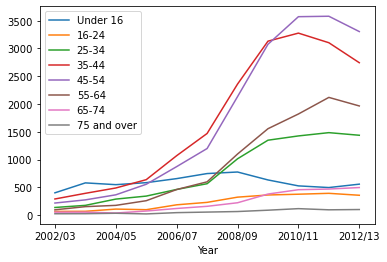

In [85]:
df_obes.drop('Total', axis=1).plot()

konklusi: anak anak di bawah 16 tahun tidak bertambah gendut dari tahun ke tahun. Tapi orang di usia antara 35-54 lumayan banyak yang bertambah obesitasnya.

In [86]:
# coba hapus /02 /03 /05 ... dari data Year nya

# Time Series
kita akan buat data dummy tipe time series

In [88]:
from datetime import datetime

In [89]:
# membuat data waktu urut
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [91]:
# bikin dataframe, isi kolom tanggal, kasi judul kolom tanggal
df = pd.DataFrame(date_rng, columns=['date'])
df

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00
...,...
164,2020-01-07 20:00:00
165,2020-01-07 21:00:00
166,2020-01-07 22:00:00
167,2020-01-07 23:00:00


In [92]:
# bikin dummy data nya
# misal anggap ini data visitor sebuah website per jam
df['data'] = np.random.randint(0,100, size=len(date_rng))
df

,date,data
0,2020-01-01 00:00:00,23
1,2020-01-01 01:00:00,89
2,2020-01-01 02:00:00,85
3,2020-01-01 03:00:00,34
4,2020-01-01 04:00:00,82
...,...,...
164,2020-01-07 20:00:00,46
165,2020-01-07 21:00:00,29
166,2020-01-07 22:00:00,22
167,2020-01-07 23:00:00,51


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    169 non-null    datetime64[ns]
 1   data    169 non-null    int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 2.1 KB


In [96]:
# kita gunakan tanggal nya sebagai index
df.set_index('date', inplace=True)
df

,data
date,
2020-01-01 00:00:00,23
2020-01-01 01:00:00,89
2020-01-01 02:00:00,85
2020-01-01 03:00:00,34
2020-01-01 04:00:00,82
...,...
2020-01-07 20:00:00,46
2020-01-07 21:00:00,29
2020-01-07 22:00:00,22


In [103]:
# note, string ada yang bisa diubah jadi datetime
str_date = ['June-01-2020', 'June-02-2020', 'June-03-2020']
dt = pd.to_datetime(str_date)
dt

DatetimeIndex(['2020-06-01', '2020-06-02', '2020-06-03'], dtype='datetime64[ns]', freq=None)

In [104]:
dt.day

Int64Index([1, 2, 3], dtype='int64')

In [105]:
dt.weekday # 0 = Senin

Int64Index([0, 1, 2], dtype='int64')

In [106]:
dt.month

Int64Index([6, 6, 6], dtype='int64')

untuk tipe data datetime, kita bisa ambil datanya untuk tanggal tertentu, bulan tertentu, hari tertentu, jam tertentu dengan mudah

In [107]:
# contoh: ambil data tanggal 2 saja
df[df.index.day == 2].head()

,data
date,
2020-01-02 00:00:00,82
2020-01-02 01:00:00,99
2020-01-02 02:00:00,96
2020-01-02 03:00:00,65
2020-01-02 04:00:00,61


In [110]:
# contoh: ambil data hari sabtu saja
df[df.index.weekday == 5].head()

,data
date,
2020-01-04 00:00:00,85
2020-01-04 01:00:00,99
2020-01-04 02:00:00,17
2020-01-04 03:00:00,12
2020-01-04 04:00:00,18


In [115]:
# ambil tanggal tertentu
df['2020-Jan-7'].head()

,data
date,
2020-01-07 00:00:00,89
2020-01-07 01:00:00,82
2020-01-07 02:00:00,65
2020-01-07 03:00:00,81
2020-01-07 04:00:00,5


In [117]:
df['2020-Jan-3': '2020-Jan-5'].head()

,data
date,
2020-01-03 00:00:00,0
2020-01-03 01:00:00,81
2020-01-03 02:00:00,21
2020-01-03 03:00:00,22
2020-01-03 04:00:00,93


In [124]:
# ambil tanggal2 tertentu di jam tertentu
df2 = df['2020-Jan-3':'2020-Jan-5']
df2[df2.index.hour == 22]

,data
date,
2020-01-03 22:00:00,16
2020-01-04 22:00:00,9
2020-01-05 22:00:00,80


In [125]:
# lihat total visitor per hari, bukan per jam
df.resample('D').sum()

,data
date,
2020-01-01,1340
2020-01-02,1436
2020-01-03,1247
2020-01-04,1217
2020-01-05,1157
2020-01-06,1461
2020-01-07,1011
2020-01-08,19


In [128]:
df_day = df.resample('D').sum()
df_day['rolling_sum'] = df_day.rolling(3).sum()
df_day

,data,rolling_sum
date,,
2020-01-01,1340,NaN
2020-01-02,1436,NaN
2020-01-03,1247,4023.0
2020-01-04,1217,3900.0
2020-01-05,1157,3621.0
2020-01-06,1461,3835.0
2020-01-07,1011,3629.0
2020-01-08,19,2491.0


In [127]:
# lihat rolling sum
df['rolling_sum'] = df.rolling(3).sum()
df

,data,rolling_sum
date,,
2020-01-01 00:00:00,23,NaN
2020-01-01 01:00:00,89,NaN
2020-01-01 02:00:00,85,197.0
2020-01-01 03:00:00,34,208.0
2020-01-01 04:00:00,82,201.0
...,...,...
2020-01-07 20:00:00,46,141.0
2020-01-07 21:00:00,29,78.0
2020-01-07 22:00:00,22,97.0


In [130]:
df['rolling_sum_backfill'] = df['rolling_sum'].fillna(method='backfill')
df

,data,rolling_sum,rolling_sum_backfill
date,,,
2020-01-01 00:00:00,23,NaN,197.0
2020-01-01 01:00:00,89,NaN,197.0
2020-01-01 02:00:00,85,197.0,197.0
2020-01-01 03:00:00,34,208.0,208.0
2020-01-01 04:00:00,82,201.0,201.0
...,...,...,...
2020-01-07 20:00:00,46,141.0,141.0
2020-01-07 21:00:00,29,78.0,78.0
2020-01-07 22:00:00,22,97.0,97.0


# Time Series dengan Dataset 
- German Energy Consumption

In [131]:
df_energy = pd.read_csv('dataset/opsd_germany_daily.csv')
df_energy.shape

(4383, 5)

In [132]:
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [134]:
df_energy.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [135]:
# ubah date jadi tipe datetime
df_energy['Date'] = pd.to_datetime(df_energy['Date'])
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [136]:
# jadikan date sebagai index
df_energy.set_index('Date', inplace=True)

In [138]:
df_energy.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


tambahan:
```python
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv', index_col=0, parse_dates=True)
```
step membuat kolom pertama jadi index dan mengubah tipe data tanggal jadi datetime bisa digabungkan saat import data dengan opsi index_col=0 dan parse_dates=True

In [139]:
# kita buat kolom baru untuk tahun, bulan, dan hari
df_energy['Year'] = df_energy.index.year
df_energy['Month'] = df_energy.index.month
df_energy['Weekday'] = df_energy.index.weekday

df_energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [141]:
# kita bisa ambil data tanggal tertentu dengan index datetime nya
df_energy.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [144]:
print(df_energy.index.min())
print(df_energy.index.max())

2006-01-01 00:00:00
2017-12-31 00:00:00


coba eksplorasi dan ambil beberapa informasi dari data pemakaian listrik di German selama 2006-2017

<AxesSubplot:xlabel='Date'>

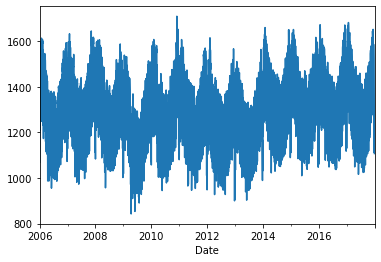

In [146]:
df_energy['Consumption'].plot()

<AxesSubplot:xlabel='Date'>

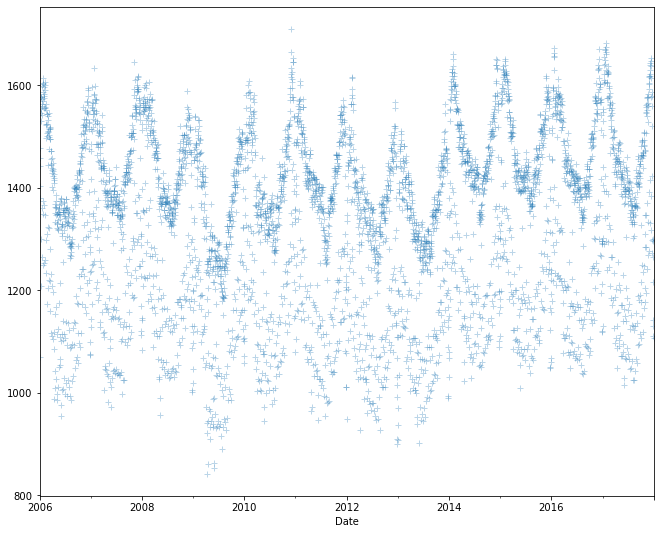

In [154]:
# cobain ubah tipe plot
df_energy['Consumption'].plot(marker='+', 
                              linestyle='None',
                              figsize=(11,9),
                              alpha=0.3
                             )

<AxesSubplot:xlabel='Date'>

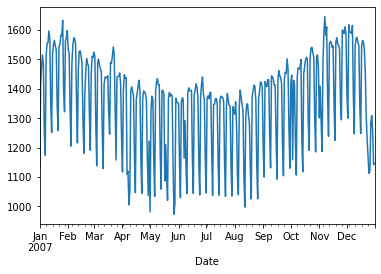

In [167]:
# lihat data 1 tahun saja
df_energy.loc['2007', 'Consumption'].plot()

<AxesSubplot:xlabel='Date'>

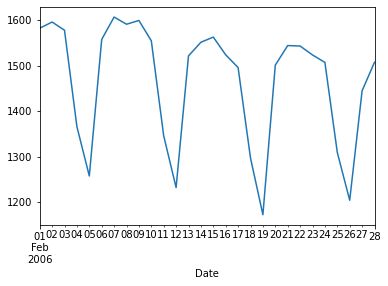

In [166]:
# lihat data 1 bulan
df_energy.loc['2006-02', 'Consumption'].plot()

<AxesSubplot:>

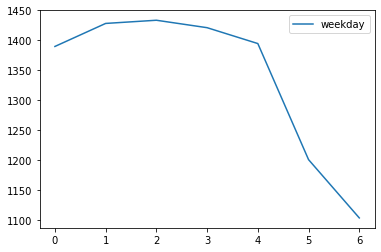

In [178]:
# lihat data per minggu
perweek = []
for w in range(7):
    m = df_energy[df_energy.index.weekday == w]['Consumption'].mean()
    perweek.append(m)
    
pd.DataFrame(perweek, columns=['weekday']).plot()

<AxesSubplot:xlabel='Date'>

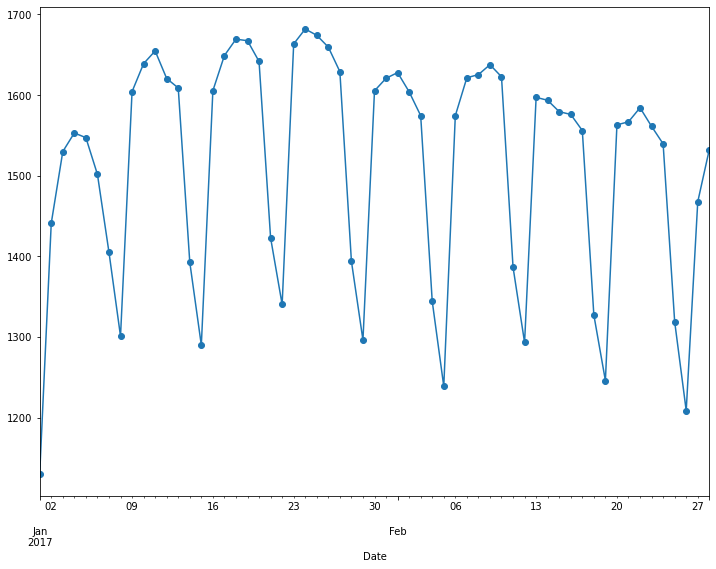

In [176]:
# lihat bulan Jan dan Feb saja di tahun 2017
df_energy.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o',
                                                       figsize=(12,9))

<AxesSubplot:xlabel='Date'>

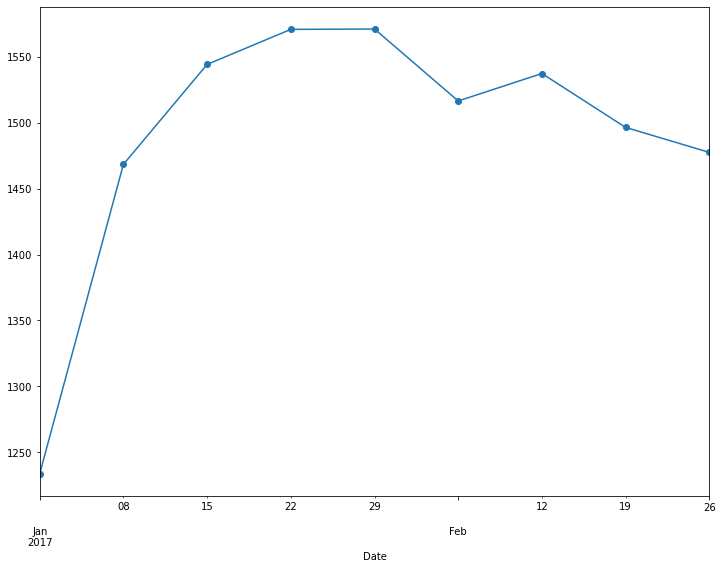

In [187]:
# resample per minggu untuk perbandingan
df_energy_weekly = df_energy.resample('W').mean()
df_energy_weekly.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o',
                                                       figsize=(12,9))

<AxesSubplot:>

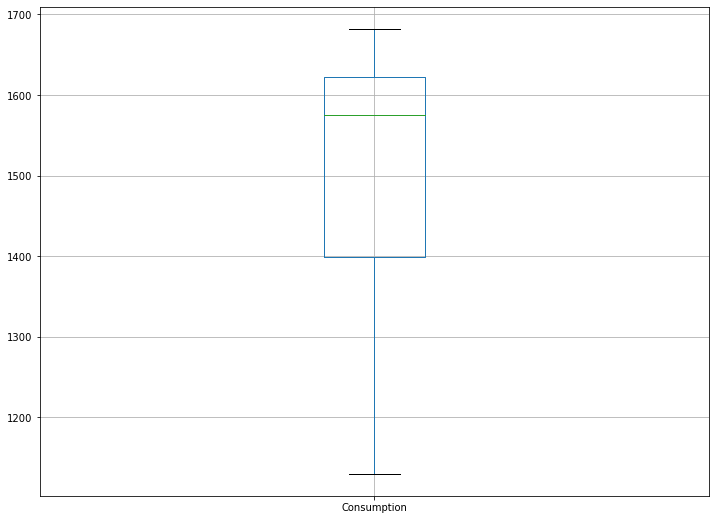

In [180]:
df_energy.loc['2017-01':'2017-02', ['Consumption']].boxplot(figsize=(12,9))

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

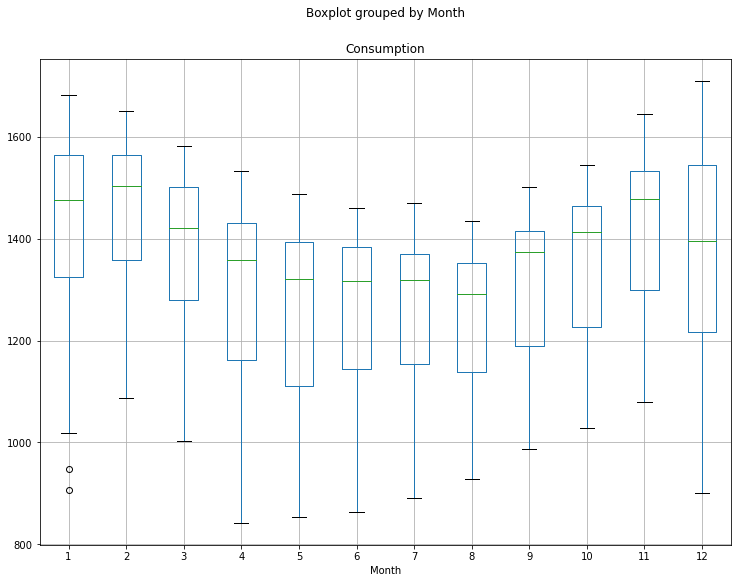

In [182]:
# box plot nya kita buat per bulan untuk data Consumption
df_energy.boxplot(column=['Consumption'], by='Month',figsize=(12,9))

### Latihan: Coba buat plot untuk rata rata per minggu pemakaian listrik tipe angin (Wind) di tahun 2017